In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import pickle
import warnings                                
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp '/content/drive/My Drive/esds_dataset/group82_resource_utilization.zip' .

In [5]:
!mkdir group

In [ ]:
!unzip 'group82_resource_utilization.zip'  -d '/content/group/'

In [2]:
#All instances df
import glob
#path ='/home/cv/workspace2/ESDS_Project/ML_project_1/group82_resource_utilization/*' 
path = '/content/group/group_1_*'
folders = glob.glob(path)

count = 0
concatenated_df = pd.DataFrame()
for i in folders:
    sub_path = i+"/mem.log"
    header_list = ["CombinedTime", "Value"]
    df_from_each_file = pd.read_csv(sub_path,sep=':',names = header_list, infer_datetime_format = True)
    
    if count==0:
        concatenated_df=df_from_each_file
        
    else:
        
        concatenated_df   = pd.concat([concatenated_df,df_from_each_file])
    count += 1
    print(count)
    
print(concatenated_df.head())


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
                   CombinedTime               Value
0  Tue Jun 09 18:05:11 IST 2020  0:0:0:0.0:0.0:553G
1  Tue Jun 09 18:15:49 IST 2020  0:0:0:0.0:0.0:553G
2  Tue Jun 09 18:25:43 IST 2020  0:0:0:0.0:0.0:553G
3  Tue Jun 09 18:35:38 IST 2020  0:0:0:0.0:0.0:553G
4  Tue Jun 09 18:45:29 IST 2020  0:0:0:0.0:0.0:553G


In [3]:
concatenated_df

,CombinedTime,Value
0,Tue Jun 09 18:05:11 IST 2020,0:0:0:0.0:0.0:553G
1,Tue Jun 09 18:15:49 IST 2020,0:0:0:0.0:0.0:553G
2,Tue Jun 09 18:25:43 IST 2020,0:0:0:0.0:0.0:553G
3,Tue Jun 09 18:35:38 IST 2020,0:0:0:0.0:0.0:553G
4,Tue Jun 09 18:45:29 IST 2020,0:0:0:0.0:0.0:553G
...,...,...
5465,Thu Mar 14 14:58:36 IST 2019,0:0:0:0.0:0.0:0G
5466,Thu Mar 14 14:58:51 IST 2019,0:0:0:0.0:0.0:0G
5467,Thu Mar 14 14:59:06 IST 2019,0:0:0:0.0:0.0:0G
5468,Thu Mar 14 14:59:21 IST 2019,0:0:0:0.0:0.0:0G


In [4]:
# path ='/home/cv/workspace2/ESDS_Project/ML_project_1/group82_resource_utilization'                     # use your path
# all_files = glob.glob(os.path.join(path, "*.log"))     # advisable to use os.path.join 
# df_from_each_file = (pd.read_csv(f, sep = ';\t').assign(VM=os.path.basename(f).split('.')[0]) for f in all_files)
# concatenated_df   = pd.concat(df_from_each_file)

In [5]:
# url = "/home/cv/workspace2/ESDS_Project/ML_project_1/group82_resource_utilization/group_1_011a0887-5900-40cc-9639-363b4e232a19/mem.log"
# header_list = ["CombinedTime", "Value"]
# df = pd.read_csv(url,sep=':',names = header_list, infer_datetime_format = True)

In [6]:
df = concatenated_df

In [7]:
df.head()

,CombinedTime,Value
0,Tue Jun 09 18:05:11 IST 2020,0:0:0:0.0:0.0:553G
1,Tue Jun 09 18:15:49 IST 2020,0:0:0:0.0:0.0:553G
2,Tue Jun 09 18:25:43 IST 2020,0:0:0:0.0:0.0:553G
3,Tue Jun 09 18:35:38 IST 2020,0:0:0:0.0:0.0:553G
4,Tue Jun 09 18:45:29 IST 2020,0:0:0:0.0:0.0:553G


## Splitting CombinedTime Column to get Day, Month, Date, Time, TimeZone and Year Columns

In [8]:
df[['Day','Month','Date','Time','TimeZone','Year']] = df.CombinedTime.str.split(" ",expand=True) 

In [9]:
df.head()

,CombinedTime,Value,Day,Month,Date,Time,TimeZone,Year
0,Tue Jun 09 18:05:11 IST 2020,0:0:0:0.0:0.0:553G,Tue,Jun,09,18:05:11,IST,2020
1,Tue Jun 09 18:15:49 IST 2020,0:0:0:0.0:0.0:553G,Tue,Jun,09,18:15:49,IST,2020
2,Tue Jun 09 18:25:43 IST 2020,0:0:0:0.0:0.0:553G,Tue,Jun,09,18:25:43,IST,2020
3,Tue Jun 09 18:35:38 IST 2020,0:0:0:0.0:0.0:553G,Tue,Jun,09,18:35:38,IST,2020
4,Tue Jun 09 18:45:29 IST 2020,0:0:0:0.0:0.0:553G,Tue,Jun,09,18:45:29,IST,2020


##Splitting Value Column to get Memory Allocated, Memory Used, CPU Allocated, CPU Used, Network bandwidth utilization and Storage space utilization Values

In [10]:
df[['Memory Allocated','Memory Used','CPU Allocated','CPU Used','Network bandwidth utilization','Storage space utilization']] = df.Value.str.split(":",expand=True) 

In [11]:
df.head()

,CombinedTime,Value,Day,Month,Date,Time,TimeZone,Year,Memory Allocated,Memory Used,CPU Allocated,CPU Used,Network bandwidth utilization,Storage space utilization
0,Tue Jun 09 18:05:11 IST 2020,0:0:0:0.0:0.0:553G,Tue,Jun,09,18:05:11,IST,2020,0,0,0,0.0,0.0,553G
1,Tue Jun 09 18:15:49 IST 2020,0:0:0:0.0:0.0:553G,Tue,Jun,09,18:15:49,IST,2020,0,0,0,0.0,0.0,553G
2,Tue Jun 09 18:25:43 IST 2020,0:0:0:0.0:0.0:553G,Tue,Jun,09,18:25:43,IST,2020,0,0,0,0.0,0.0,553G
3,Tue Jun 09 18:35:38 IST 2020,0:0:0:0.0:0.0:553G,Tue,Jun,09,18:35:38,IST,2020,0,0,0,0.0,0.0,553G
4,Tue Jun 09 18:45:29 IST 2020,0:0:0:0.0:0.0:553G,Tue,Jun,09,18:45:29,IST,2020,0,0,0,0.0,0.0,553G


##Getting the profile report using pandas_profiling module to get insights on the dataset

In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

TypeError: ignored

In [ ]:
profile.to_file("initial_report.html")

In [ ]:
#Columns to be Removed
#Network bandwidth utilization, CPU Used and CPU Allocated to be worked as CPU Usage(%),Memory Used and Memory Allocated to be worked as Memory Usage(%),Time, Date, Month and Year can be combined as Index 

In [13]:
df.drop(["CombinedTime", "Value", "Network bandwidth utilization","TimeZone","Storage space utilization",], axis = 1, inplace = True)

In [14]:
df.head()

,Day,Month,Date,Time,Year,Memory Allocated,Memory Used,CPU Allocated,CPU Used
0,Tue,Jun,09,18:05:11,2020,0,0,0,0.0
1,Tue,Jun,09,18:15:49,2020,0,0,0,0.0
2,Tue,Jun,09,18:25:43,2020,0,0,0,0.0
3,Tue,Jun,09,18:35:38,2020,0,0,0,0.0
4,Tue,Jun,09,18:45:29,2020,0,0,0,0.0


In [15]:
print(df['Memory Used'].isnull().sum())
print(df['Memory Allocated'].isnull().sum())
print(df['CPU Used'].isnull().sum())
print(df['CPU Allocated'].isnull().sum())

0
0
0
0


In [16]:
df['Memory Usage'] = (df['Memory Used'].astype(float)/ df['Memory Allocated'].astype(float)).fillna(0)
df['CPU Usage'] = (df['CPU Used'].astype(float) / df['CPU Allocated'].astype(float)).fillna(0)
df['Time'].fillna( method ='ffill', limit = 1, inplace = True) 


In [17]:
print(df['Time'].isnull().sum())
print(df['Memory Usage'].isnull().sum())
print(df['CPU Usage'].isnull().sum())
print(df['Month'].isnull().sum())

0
0
0
0


In [18]:
df.head()

,Day,Month,Date,Time,Year,Memory Allocated,Memory Used,CPU Allocated,CPU Used,Memory Usage,CPU Usage
0,Tue,Jun,09,18:05:11,2020,0,0,0,0.0,0.0,0.0
1,Tue,Jun,09,18:15:49,2020,0,0,0,0.0,0.0,0.0
2,Tue,Jun,09,18:25:43,2020,0,0,0,0.0,0.0,0.0
3,Tue,Jun,09,18:35:38,2020,0,0,0,0.0,0.0,0.0
4,Tue,Jun,09,18:45:29,2020,0,0,0,0.0,0.0,0.0


In [19]:
look_up = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'09','Dec':'12'}

df['Month'] = df['Month'].apply(lambda x: look_up[x])

In [20]:
df.head()

,Day,Month,Date,Time,Year,Memory Allocated,Memory Used,CPU Allocated,CPU Used,Memory Usage,CPU Usage
0,Tue,06,09,18:05:11,2020,0,0,0,0.0,0.0,0.0
1,Tue,06,09,18:15:49,2020,0,0,0,0.0,0.0,0.0
2,Tue,06,09,18:25:43,2020,0,0,0,0.0,0.0,0.0
3,Tue,06,09,18:35:38,2020,0,0,0,0.0,0.0,0.0
4,Tue,06,09,18:45:29,2020,0,0,0,0.0,0.0,0.0


In [21]:
df["dates"] = df["Year"]+ df["Month"]+ df["Date"]+ ' ' +df['Time']

In [22]:
df.head()

,Day,Month,Date,Time,Year,Memory Allocated,Memory Used,CPU Allocated,CPU Used,Memory Usage,CPU Usage,dates
0,Tue,06,09,18:05:11,2020,0,0,0,0.0,0.0,0.0,20200609 18:05:11
1,Tue,06,09,18:15:49,2020,0,0,0,0.0,0.0,0.0,20200609 18:15:49
2,Tue,06,09,18:25:43,2020,0,0,0,0.0,0.0,0.0,20200609 18:25:43
3,Tue,06,09,18:35:38,2020,0,0,0,0.0,0.0,0.0,20200609 18:35:38
4,Tue,06,09,18:45:29,2020,0,0,0,0.0,0.0,0.0,20200609 18:45:29


In [23]:
df["dates"] = df["dates"].apply(pd.to_datetime, format='%Y%m%d %H:%M:%S')
#format='%Y%m%d'

In [24]:
df.head()

,Day,Month,Date,Time,Year,Memory Allocated,Memory Used,CPU Allocated,CPU Used,Memory Usage,CPU Usage,dates
0,Tue,06,09,18:05:11,2020,0,0,0,0.0,0.0,0.0,2020-06-09 18:05:11
1,Tue,06,09,18:15:49,2020,0,0,0,0.0,0.0,0.0,2020-06-09 18:15:49
2,Tue,06,09,18:25:43,2020,0,0,0,0.0,0.0,0.0,2020-06-09 18:25:43
3,Tue,06,09,18:35:38,2020,0,0,0,0.0,0.0,0.0,2020-06-09 18:35:38
4,Tue,06,09,18:45:29,2020,0,0,0,0.0,0.0,0.0,2020-06-09 18:45:29


In [25]:
#df["Time"] = pd.to_timedelta(df["Time"])

In [26]:
df.drop(["Month","Date","Year"], axis = 1, inplace = True)

In [27]:
df.drop(["Memory Allocated","Memory Used","CPU Allocated","CPU Used"],axis = 1, inplace = True)
df.head()

,Day,Time,Memory Usage,CPU Usage,dates
0,Tue,18:05:11,0.0,0.0,2020-06-09 18:05:11
1,Tue,18:15:49,0.0,0.0,2020-06-09 18:15:49
2,Tue,18:25:43,0.0,0.0,2020-06-09 18:25:43
3,Tue,18:35:38,0.0,0.0,2020-06-09 18:35:38
4,Tue,18:45:29,0.0,0.0,2020-06-09 18:45:29


In [28]:
df = df.set_index('dates')
df.head()

,Day,Time,Memory Usage,CPU Usage
dates,,,,
2020-06-09 18:05:11,Tue,18:05:11,0.0,0.0
2020-06-09 18:15:49,Tue,18:15:49,0.0,0.0
2020-06-09 18:25:43,Tue,18:25:43,0.0,0.0
2020-06-09 18:35:38,Tue,18:35:38,0.0,0.0
2020-06-09 18:45:29,Tue,18:45:29,0.0,0.0


In [29]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

TypeError: ignored

In [ ]:
profile.to_file("report.html")

In [ ]:
#Need to combine date and time columns, then plot bar plots and then modeling and testing

In [30]:
import matplotlib
print(matplotlib.__version__)

3.3.1


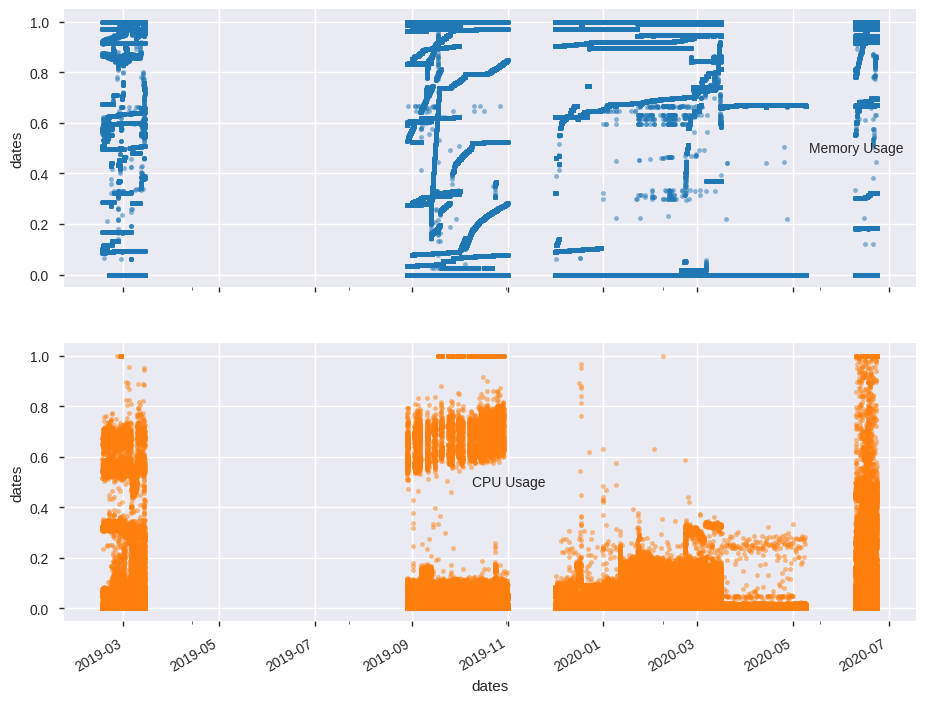

In [31]:
cols_plot = ['Memory Usage', 'CPU Usage']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('dates')

Text(0, 0.5, 'CPU Usage')

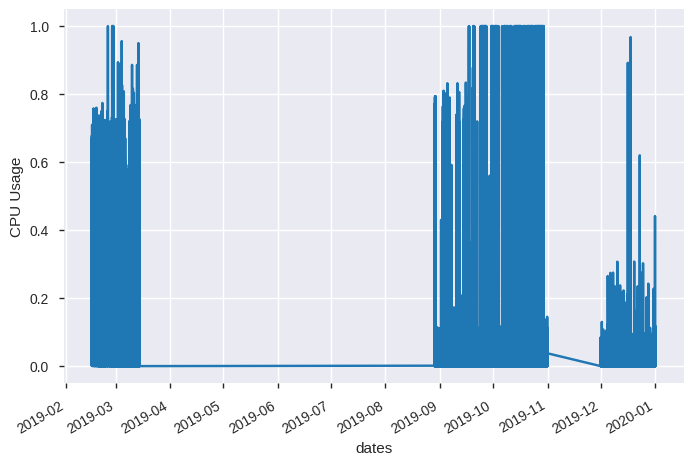

In [32]:
ax = df.loc['2019', 'CPU Usage'].plot()
ax.set_xlabel('dates')
ax.set_ylabel('CPU Usage')

Text(0, 0.5, 'CPU Usage')

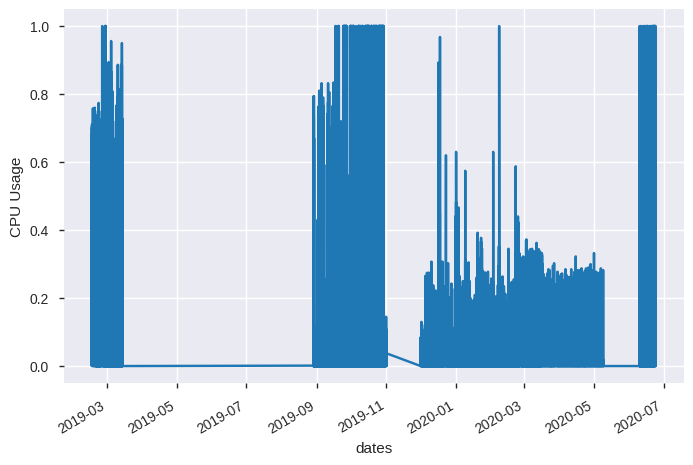

In [33]:
ax = df.loc['2019':'2020', 'CPU Usage'].plot()
ax.set_xlabel('dates')
ax.set_ylabel('CPU Usage')

In [34]:
#Weekday Usage detector

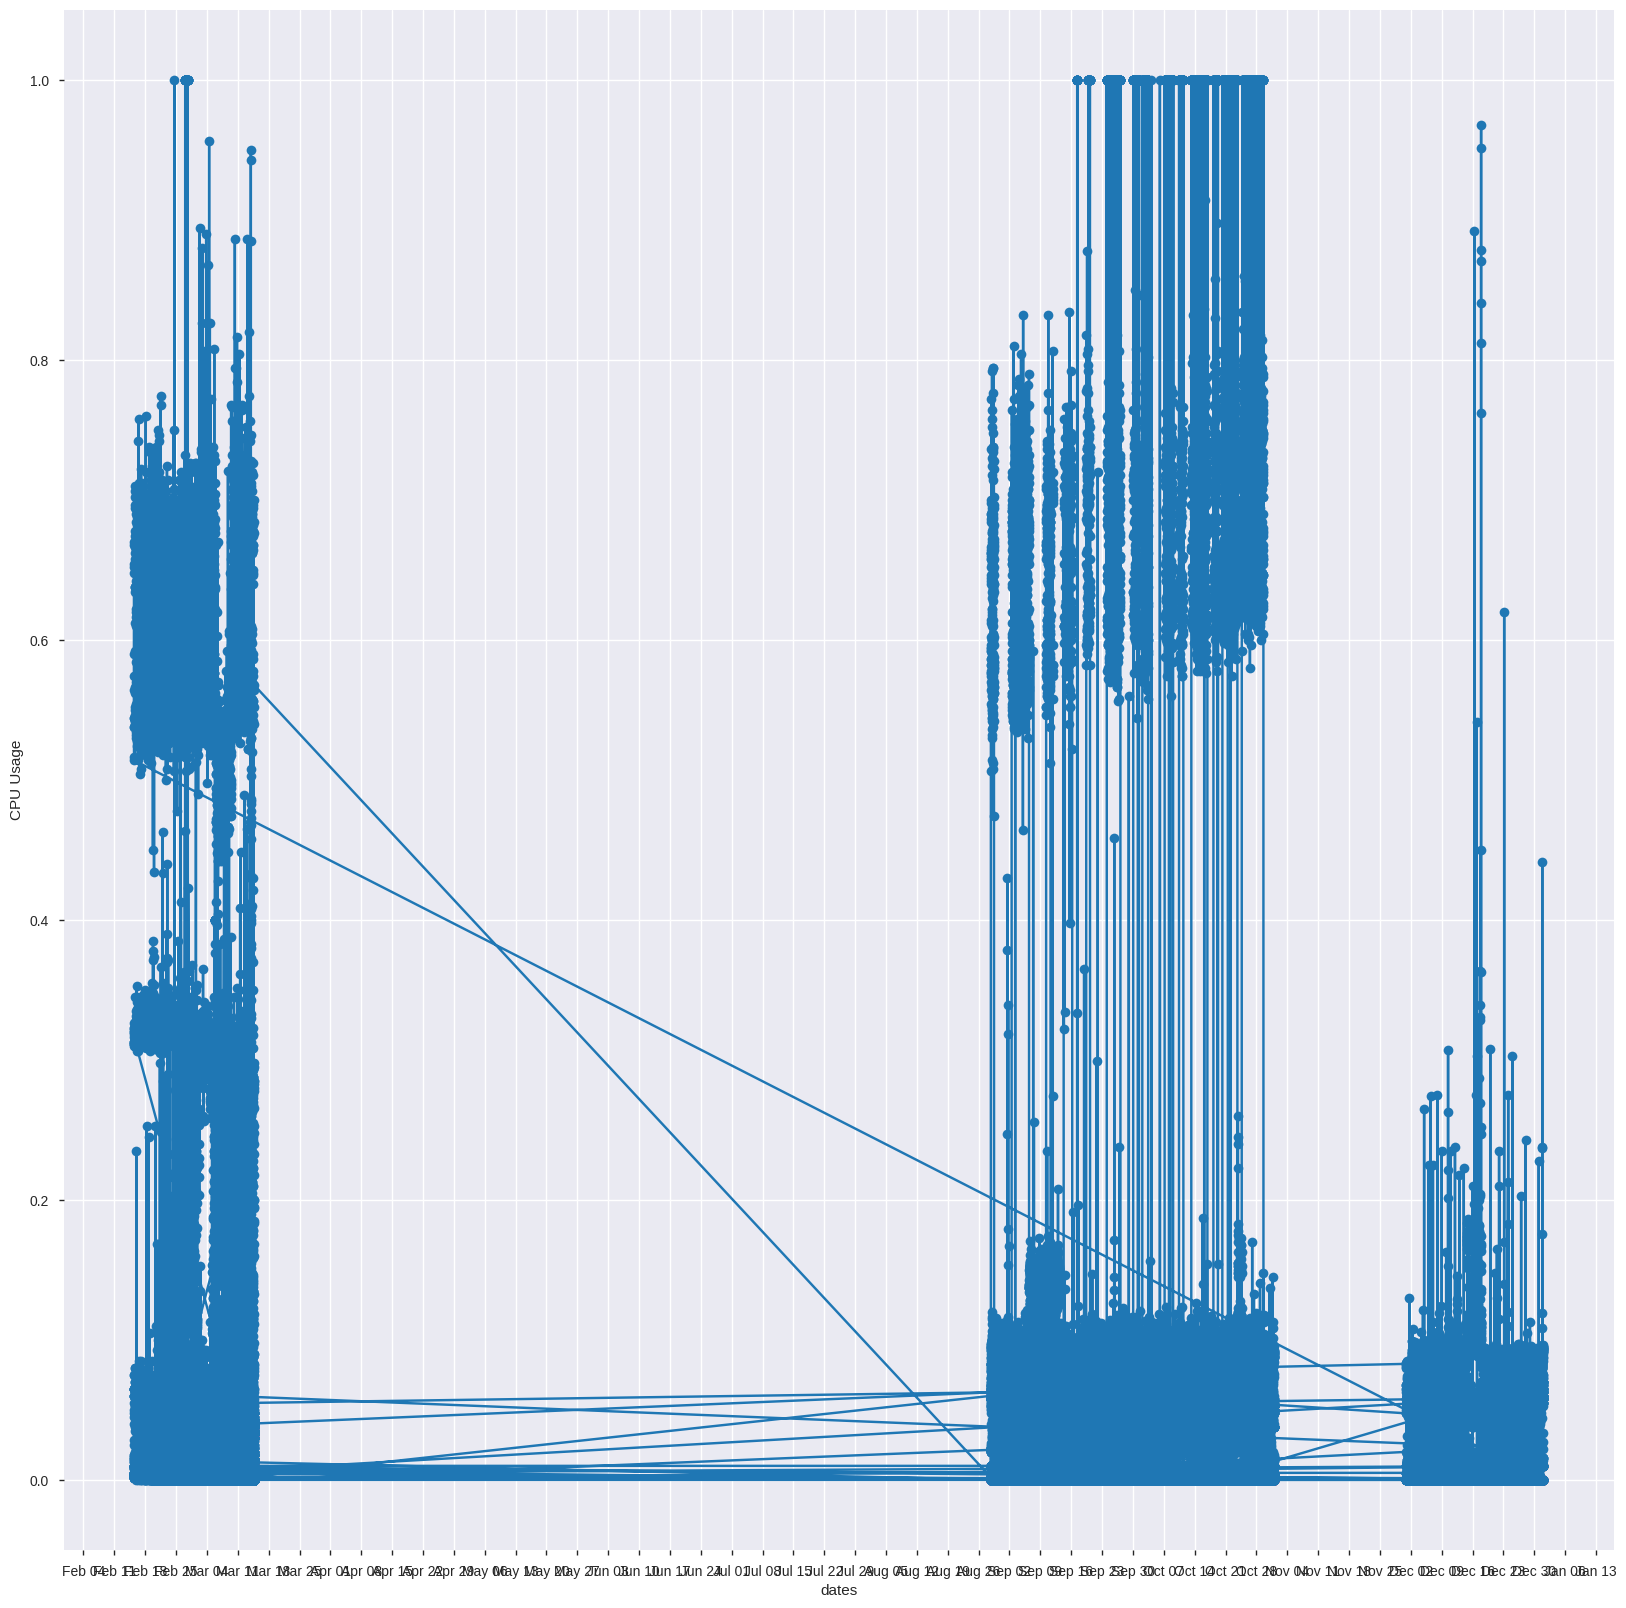

In [35]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(df.loc['2019', 'CPU Usage'], marker='o', linestyle='-')
ax.set_xlabel('dates')
ax.set_ylabel('CPU Usage')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

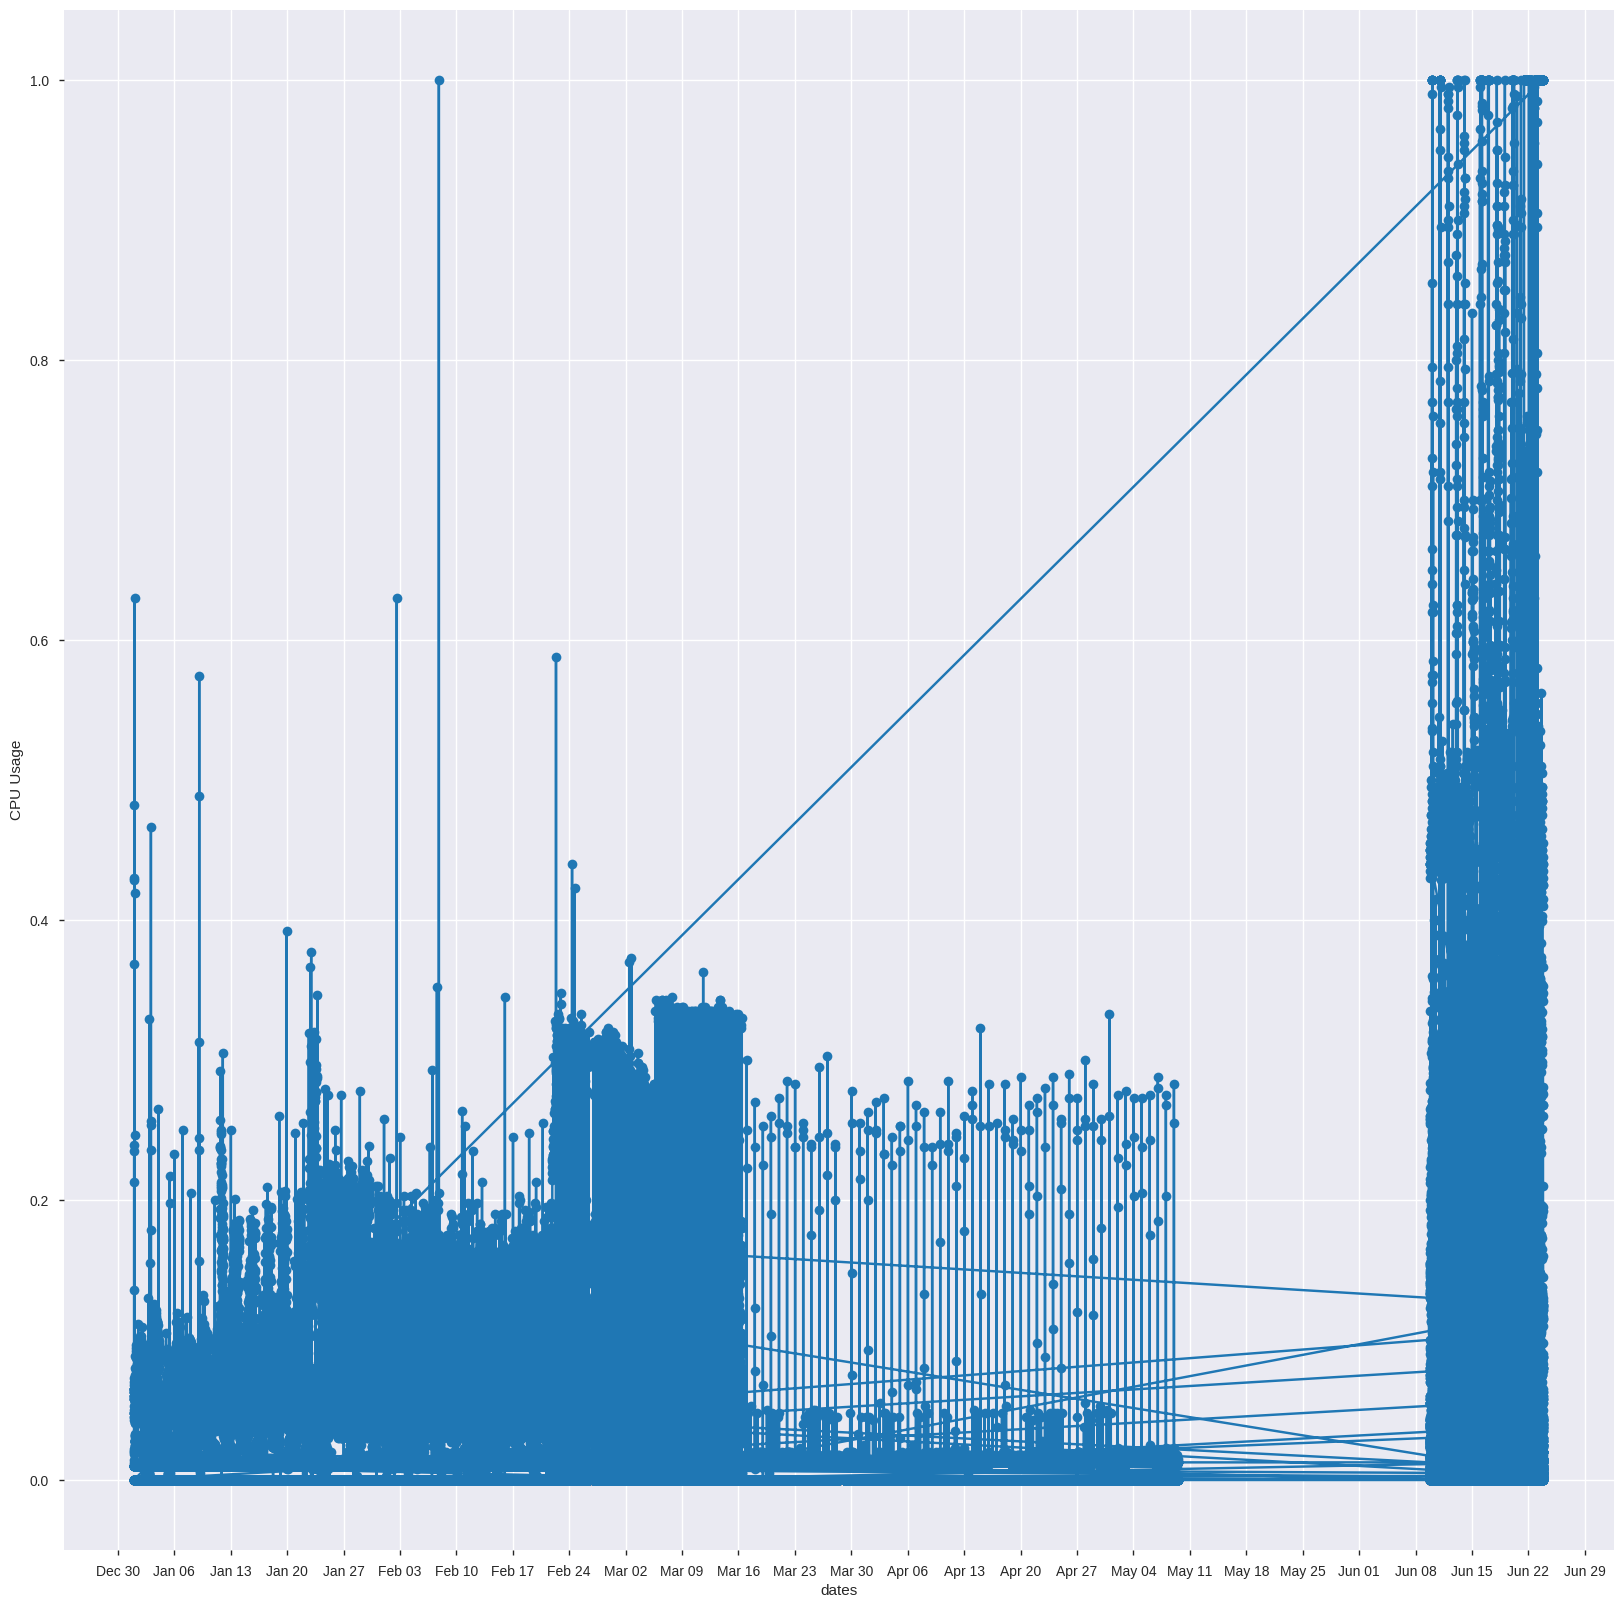

In [36]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(df.loc['2020', 'CPU Usage'], marker='o', linestyle='-')
ax.set_xlabel('dates')
ax.set_ylabel('CPU Usage')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [37]:
df.head()

,Day,Time,Memory Usage,CPU Usage
dates,,,,
2020-06-09 18:05:11,Tue,18:05:11,0.0,0.0
2020-06-09 18:15:49,Tue,18:15:49,0.0,0.0
2020-06-09 18:25:43,Tue,18:25:43,0.0,0.0
2020-06-09 18:35:38,Tue,18:35:38,0.0,0.0
2020-06-09 18:45:29,Tue,18:45:29,0.0,0.0


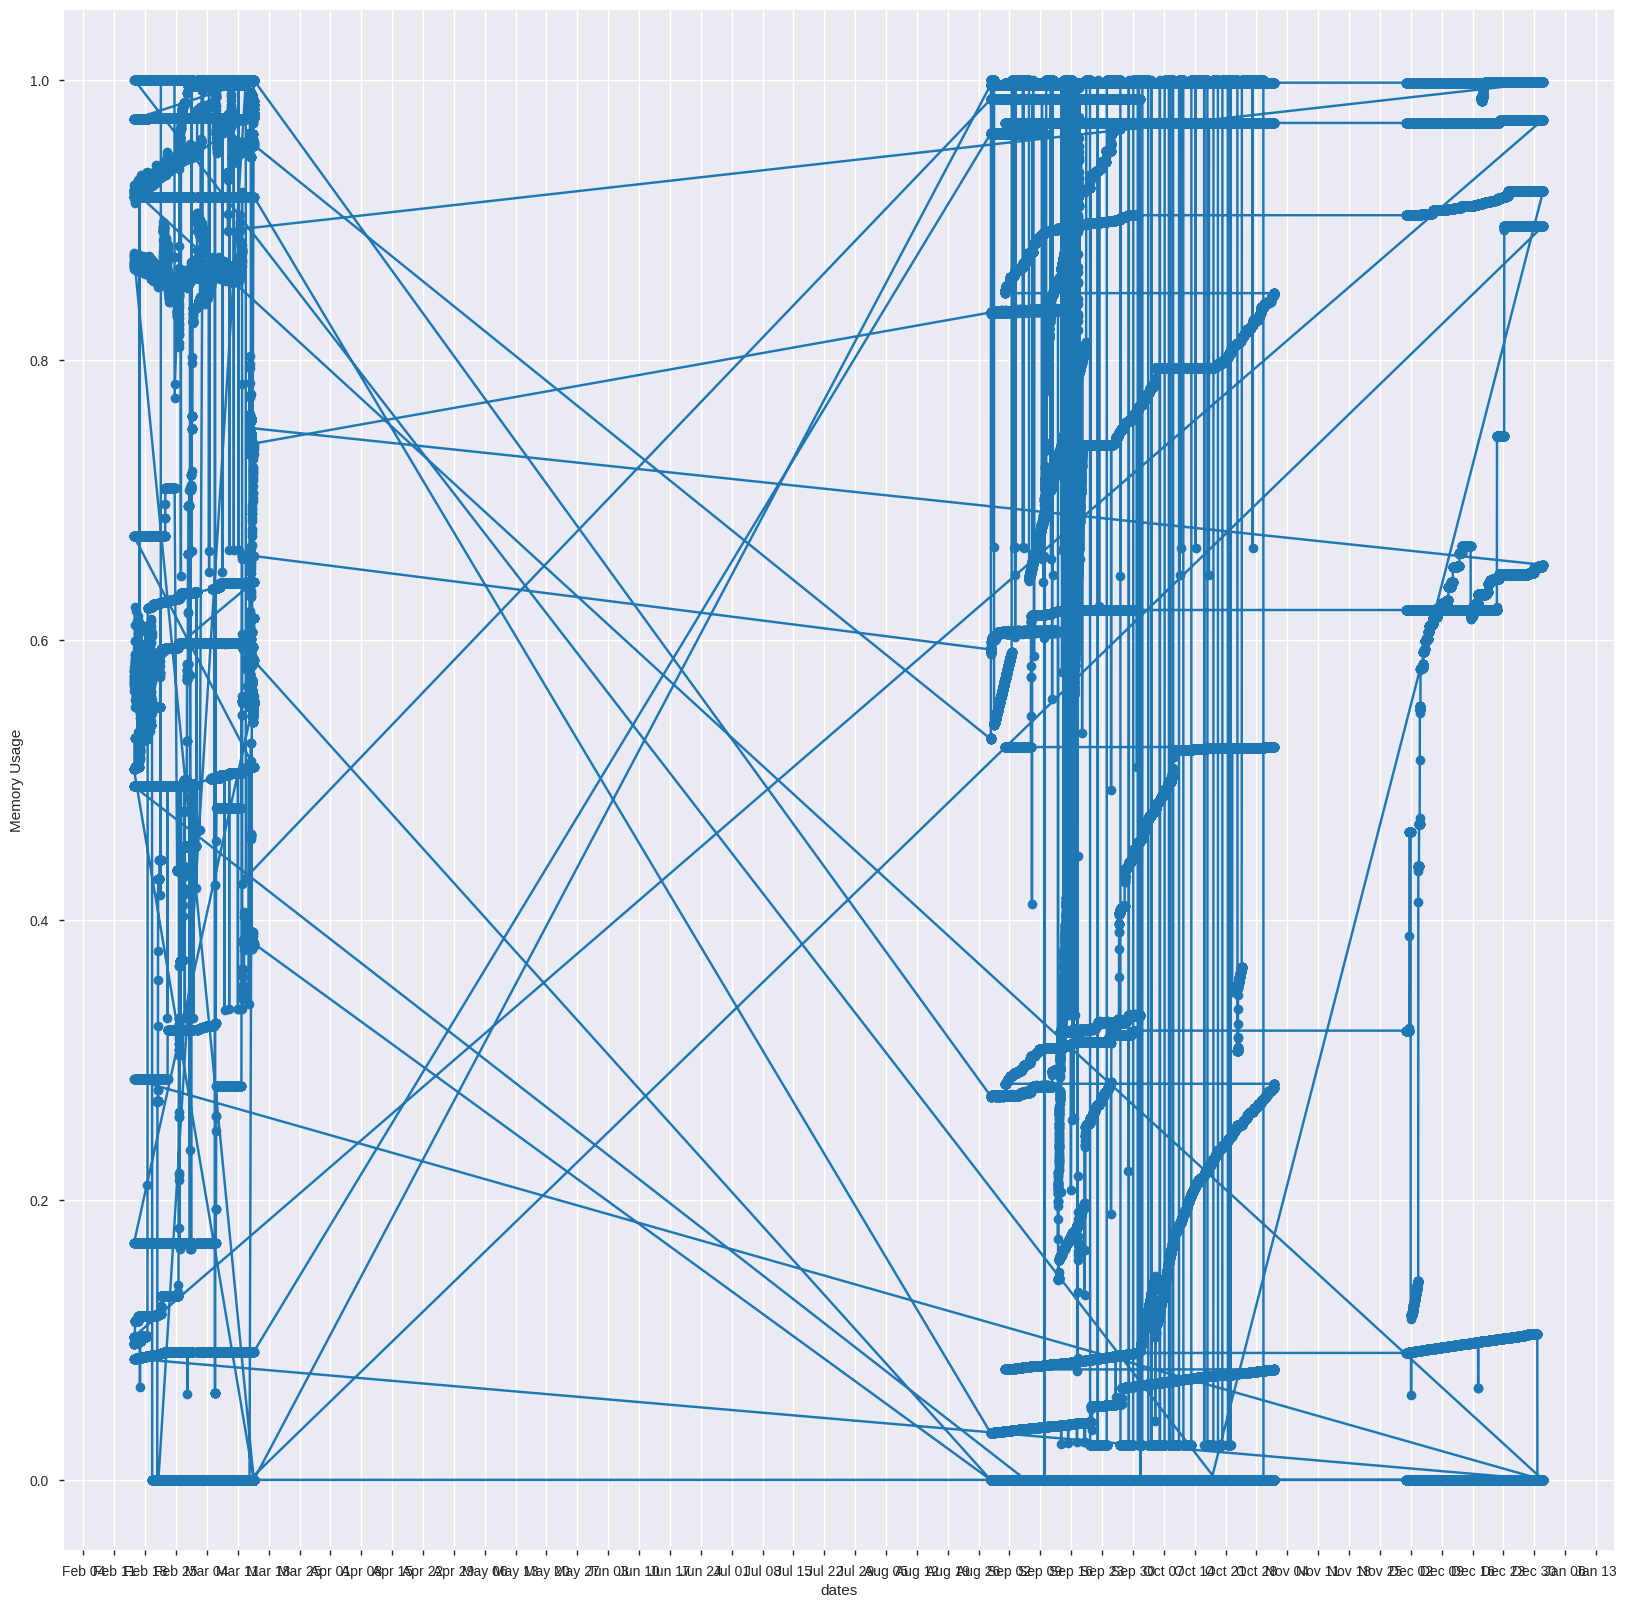

In [38]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(df.loc['2019', 'Memory Usage'], marker='o', linestyle='-')
ax.set_xlabel('dates')
ax.set_ylabel('Memory Usage')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

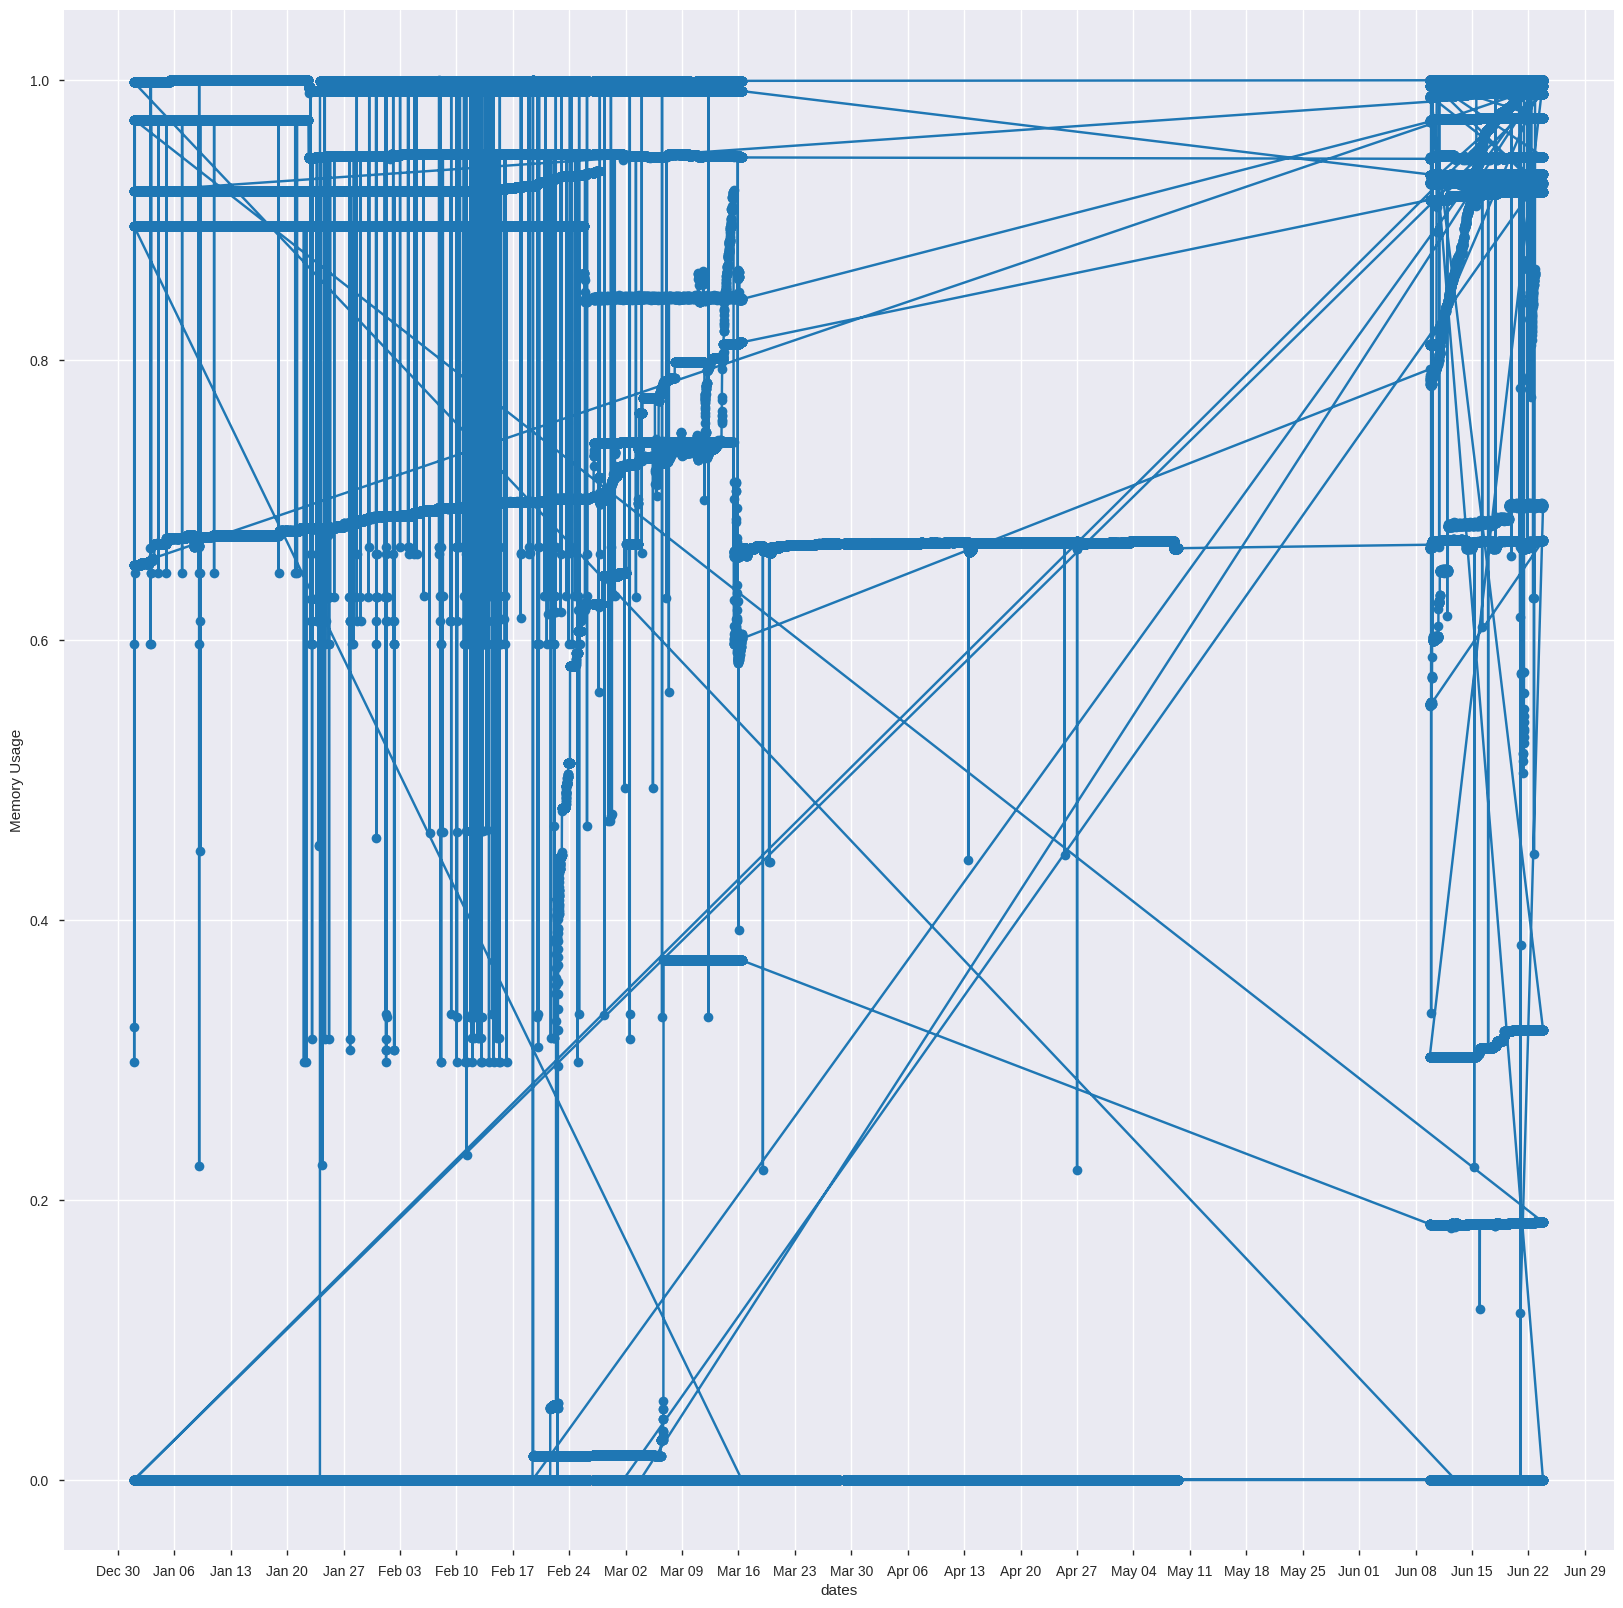

In [39]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(df.loc['2020', 'Memory Usage'], marker='o', linestyle='-')
ax.set_xlabel('dates')
ax.set_ylabel('Memory Usage')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [40]:
df.head()

,Day,Time,Memory Usage,CPU Usage
dates,,,,
2020-06-09 18:05:11,Tue,18:05:11,0.0,0.0
2020-06-09 18:15:49,Tue,18:15:49,0.0,0.0
2020-06-09 18:25:43,Tue,18:25:43,0.0,0.0
2020-06-09 18:35:38,Tue,18:35:38,0.0,0.0
2020-06-09 18:45:29,Tue,18:45:29,0.0,0.0


In [41]:
df.drop(["Day","Time"], axis = 1, inplace = True)

In [42]:
df.head()

,Memory Usage,CPU Usage
dates,,
2020-06-09 18:05:11,0.0,0.0
2020-06-09 18:15:49,0.0,0.0
2020-06-09 18:25:43,0.0,0.0
2020-06-09 18:35:38,0.0,0.0
2020-06-09 18:45:29,0.0,0.0


In [43]:
#Training and Testing Datasets
X_train = df.loc[:'2019']
y_train = df.loc[:'2019']
X_test = df.loc['2020']
y_test = df.loc['2020']

In [44]:
X_train

,Memory Usage,CPU Usage
dates,,
2019-02-15 11:01:53,0.097290,0.003333
2019-02-15 11:13:48,0.097290,0.003333
2019-02-15 11:25:43,0.097290,0.003333
2019-02-15 11:37:42,0.097351,0.003333
2019-02-15 11:49:44,0.097290,0.003333
...,...,...
2019-03-14 14:58:36,0.000000,0.000000
2019-03-14 14:58:51,0.000000,0.000000
2019-03-14 14:59:06,0.000000,0.000000


In [45]:
y_train

,Memory Usage,CPU Usage
dates,,
2019-02-15 11:01:53,0.097290,0.003333
2019-02-15 11:13:48,0.097290,0.003333
2019-02-15 11:25:43,0.097290,0.003333
2019-02-15 11:37:42,0.097351,0.003333
2019-02-15 11:49:44,0.097290,0.003333
...,...,...
2019-03-14 14:58:36,0.000000,0.000000
2019-03-14 14:58:51,0.000000,0.000000
2019-03-14 14:59:06,0.000000,0.000000


In [46]:
X_test

,Memory Usage,CPU Usage
dates,,
2020-06-09 18:05:11,0.000000,0.000000
2020-06-09 18:15:49,0.000000,0.000000
2020-06-09 18:25:43,0.000000,0.000000
2020-06-09 18:35:38,0.000000,0.000000
2020-06-09 18:45:29,0.000000,0.000000
...,...,...
2020-06-23 18:58:34,0.999985,0.280625
2020-06-23 19:07:28,0.999985,0.366250
2020-06-23 19:17:54,0.999985,0.352500


In [47]:
y_test

,Memory Usage,CPU Usage
dates,,
2020-06-09 18:05:11,0.000000,0.000000
2020-06-09 18:15:49,0.000000,0.000000
2020-06-09 18:25:43,0.000000,0.000000
2020-06-09 18:35:38,0.000000,0.000000
2020-06-09 18:45:29,0.000000,0.000000
...,...,...
2020-06-23 18:58:34,0.999985,0.280625
2020-06-23 19:07:28,0.999985,0.366250
2020-06-23 19:17:54,0.999985,0.352500


In [50]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import neural_network
from sklearn import neighbors
from sklearn import ensemble
from sklearn import svm

LR: 1.000000 (0.000000)
NN: 0.994855 (0.000688)
KNN: 0.926255 (0.072600)
RF: 0.916538 (0.081973)
SVR: nan (nan)


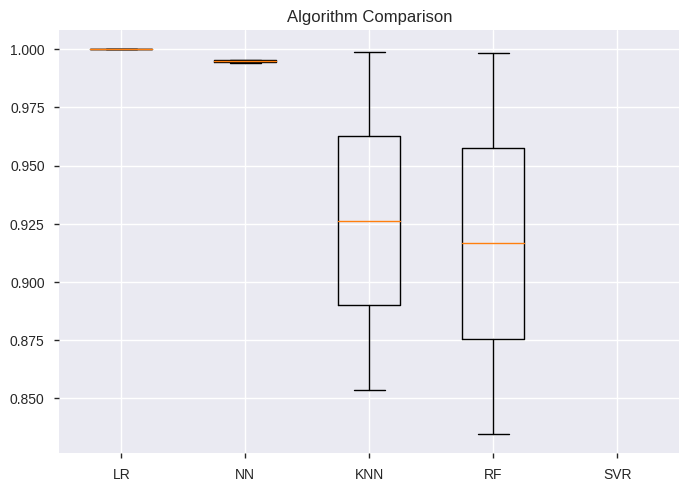

In [51]:
# Spot Check Algorithms
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('NN', neural_network.MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', neighbors.KNeighborsRegressor())) 
models.append(('RF', ensemble.RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', svm.SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=2)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [52]:
from sklearn.metrics import make_scorer
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_dis tance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [53]:
#Grid Searching for RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
model = ensemble.RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [54]:
print(best_score)

-0.018934020681710493


In [55]:
print(best_model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [56]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
# Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [57]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.9975
mean_squared_log_error:  0.0
r2:  0.997
MAE:  0.0016
MSE:  0.0
RMSE:  0.0044


In [61]:
filename = 'finalized_group_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [62]:
y_pred

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.99970819, 0.35030003],
       [0.99972176, 0.2601574 ],
       [0.99918647, 0.19144954]])

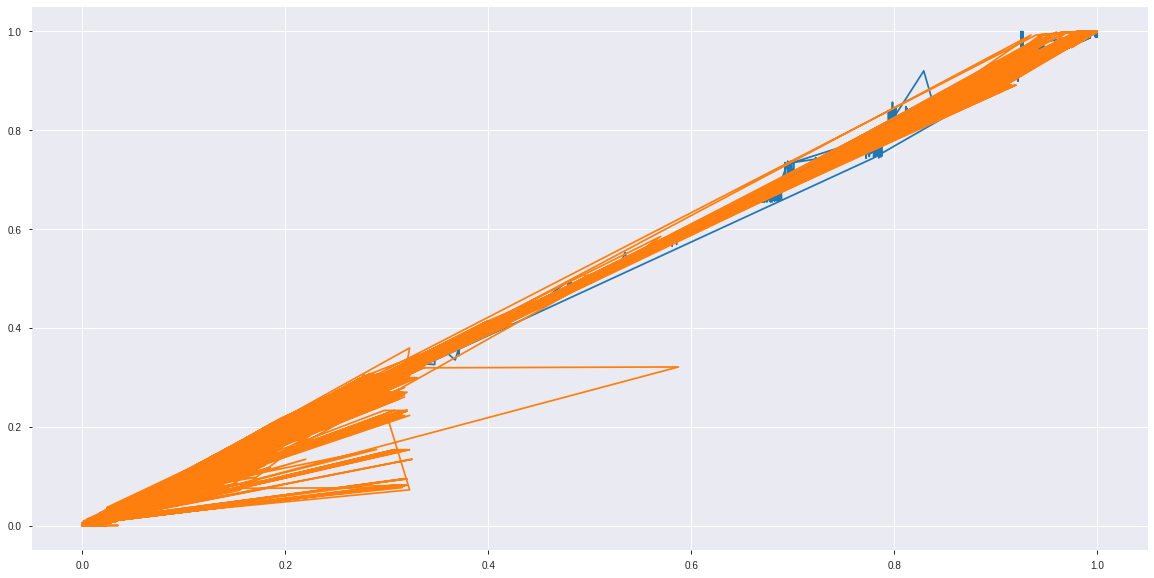

In [63]:
plt.figure(figsize=(20,10))
plt.plot(X_test,y_pred)
plt.show()

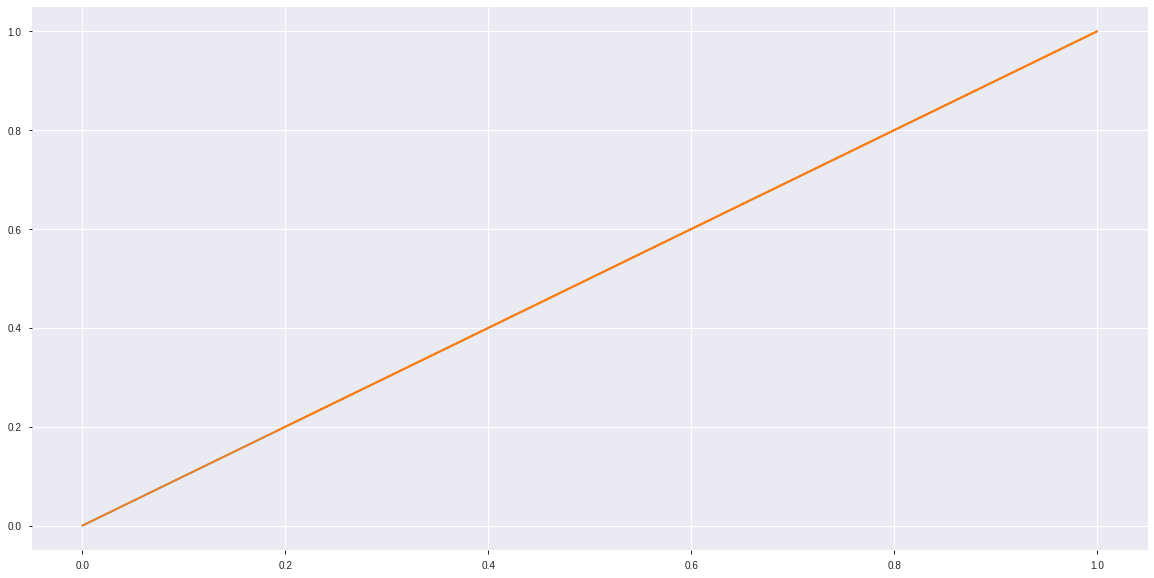

In [64]:
plt.figure(figsize=(20,10))
plt.plot(X_test,y_true)
plt.show()

Text(0, 0.5, 'CPU Usage')

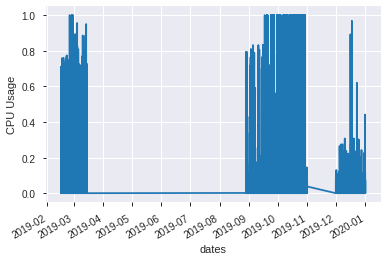

In [65]:
ax = df.loc['2019', 'CPU Usage'].plot()
ax.set_xlabel('dates')
ax.set_ylabel('CPU Usage')

In [66]:
df

,Memory Usage,CPU Usage
dates,,
2020-06-09 18:05:11,0.0,0.0
2020-06-09 18:15:49,0.0,0.0
2020-06-09 18:25:43,0.0,0.0
2020-06-09 18:35:38,0.0,0.0
2020-06-09 18:45:29,0.0,0.0
...,...,...
2019-03-14 14:58:36,0.0,0.0
2019-03-14 14:58:51,0.0,0.0
2019-03-14 14:59:06,0.0,0.0


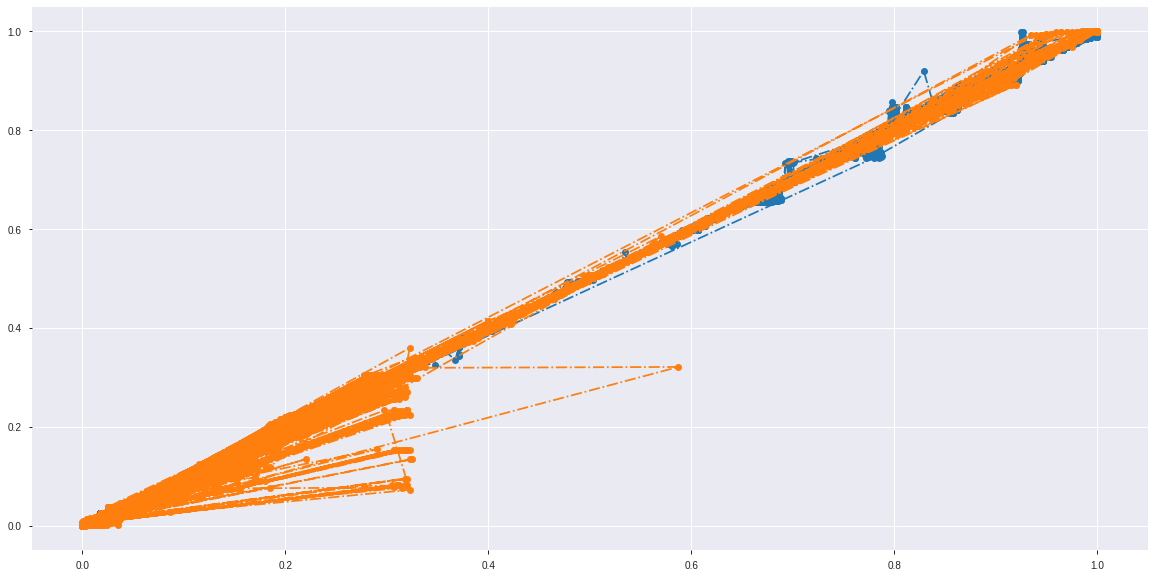

In [67]:
plt.figure(figsize=(20,10))
plt.plot(y_true,y_pred,marker='o',linestyle='-.')
plt.show()

In [68]:
y_pred

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.99970819, 0.35030003],
       [0.99972176, 0.2601574 ],
       [0.99918647, 0.19144954]])

In [69]:
y_true

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.99998474, 0.3525    ],
       [0.99998474, 0.26      ],
       [0.99998474, 0.191875  ]])